In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import Cell1D

In [2]:
rows = 5
cols = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0, 5] = 1
print(array)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


In [3]:
def plot_ca(array, rows, cols):
    cmap = plt.get_cmap('Blues')
    plt.imshow(array, cmap=cmap, interpolation='none')
    
def step(array, i):
    rows, cols = array.shape
    row = array[i-1]
    for j in range(1, cols):
        elts = row[j-1:j+2]
        array[i, j] = sum(elts) % 2

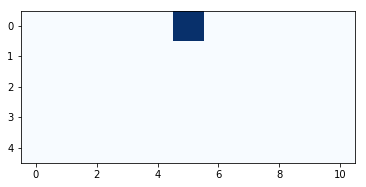

In [4]:
plot_ca(array, rows, cols)

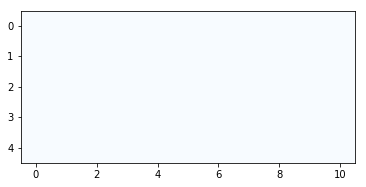

In [5]:
for i in range(rows):
    step(array, i)

plot_ca(array, rows, cols)

In [6]:
def c_k(a, w, k):
    N = len(w)
    return sum(a[k:k+N] * w)

In [7]:
N = 10
row = np.arange(N, dtype=np.uint8)
print(row)

[0 1 2 3 4 5 6 7 8 9]


In [8]:
window = [1, 1, 1]
print(window)

[1, 1, 1]


In [9]:
c_k(row, window, 2)

9

In [10]:
def correlate(row, window):
    cols = len(row)
    N = len(window)
    c = [c_k(row, window, k) for k in range(cols-N+1)]
    return np.array(c)

c = correlate(row, window)
print(c)

[ 3  6  9 12 15 18 21 24]


In [11]:
c = np.correlate(row, window, mode='valid')
print(c)

[ 3  6  9 12 15 18 21 24]


In [12]:
c = np.correlate(row, window, mode='same') #adds zeros to the end of the initial array. 
                                            #So zero will be added to the last calculation
print(c, len(c))

[ 1  3  6  9 12 15 18 21 24 17] 10


In [13]:
def step2(array, i, window=[1,1,1]):
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = x % 2

In [14]:
def step3(array, i, window=[4,2,1]):
    row = array[i-1]
    c = np.correlate(row, window, mode='same')
    array[i] = table[c]
    
def make_table(rule):
    rule = np.array([rule], dtype=np.uint8)
    table = np.unpackbits(rule)[::-1]
    return table

In [15]:
table = make_table(150)
print(table)

[0 1 1 0 1 0 0 1]


# Exercises

## Exercise 1

In [16]:
r = np.arange(10, dtype=np.uint8)
print(r, len(r))
win = [3,3]
res = np.pad(r, win, mode='edge')
print(res, len(res))

[0 1 2 3 4 5 6 7 8 9] 10
[0 0 0 0 1 2 3 4 5 6 7 8 9 9 9 9] 16


In [17]:
def correlate1(row, window):
    print(row)
    rw = np.pad(row,[1,1], 'linear_ramp', end_values=(0,0))
    cols = len(rw)
    N = len(window)
    print(rw)
    c = [c_k(rw, window, k) for k in range(cols-N+1)]
    return c

In [18]:
a = np.correlate(row, window, mode='same')
b = correlate1(row, window)
print(a, len(a))
print(b, len(b))

[0 1 2 3 4 5 6 7 8 9]
[0 0 1 2 3 4 5 6 7 8 9 0]
[ 1  3  6  9 12 15 18 21 24 17] 10
[1, 3, 6, 9, 12, 15, 18, 21, 24, 17] 10


## Exercise 2

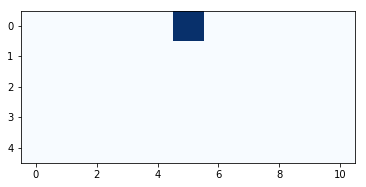

In [20]:
r = 5
c = 11
array = np.zeros((rows, cols), dtype=np.uint8)
array[0,5] = 1
plot_ca(array, rows, cols)

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 2 1 0 0 0]
 [0 0 0 0 0 1 3 3 1 0 0]
 [0 0 0 0 0 1 4 6 4 1 0]]


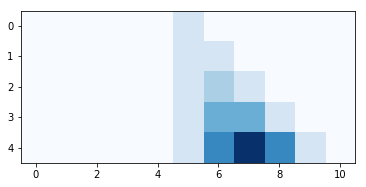

In [21]:
for i in range(rows-1):
    array[i+1] = np.correlate(array[i], [1,1,0], mode='same')

print(array)
plot_ca(array, rows, cols)

In [22]:
def gen_ca(rows, cols, rule):
    array = np.zeros((rows, cols), dtype=np.uint8)
    array[0, math.ceil(cols/2)] = 1
    for i in range(rows-1):
        array[i+1] = np.correlate(array[i], rule, mode='same')
    #plot_ca(array, rows, cols)
    plt.imshow(array, plt.get_cmap('copper'), interpolation='none')

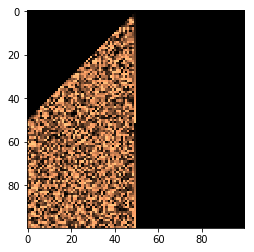

In [23]:
gen_ca(100, 100, [0,1,5])

In [24]:
def run_ca(init, n=None, rule=110):
    m = len(init)
    n = m if n is None else n
    
    ca = Cell1D.Cell1D(rule, n, m)
    ca.start_string(init)
    ca.loop(n-1)
    return Cell1D.Cell1DViewer(ca)

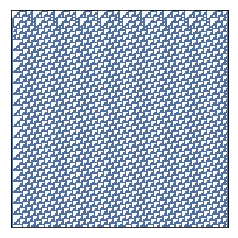

In [25]:
bckgrnd = '00000011011111'
c1 = run_ca(bckgrnd*10)
c1.draw()

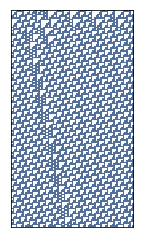

In [26]:
ship1 = '00011110111'

cb = run_ca(bckgrnd*3 + ship1 + bckgrnd * 6)
cb.draw(start=30, end=-30)

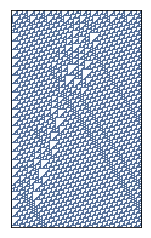

In [27]:
ship2 = '0111111011'
cc = run_ca(bckgrnd*4 + ship2 + bckgrnd*3, n=180)
cc.draw()

## Exercise 3

In [28]:
class Turing:
    
    def __init__(self, rule='101', var=None):
        self.sig = [0, 1]
        self.rule = rule
        self.tapes = np.zeros((10, 5), dtype=np.uint8)
        #self.tapes = list()
        
        if var == None:
            self.t_len = 9
            self.tape = [random.choice(self.sig) for _ in range(self.t_len)]
        elif type(var) == list:
            self.tape = var
            self.t_len = len(var)
        elif type(var) == int:
            self.t_len = var
            self.tape = [random.choice(self.sig) for _ in range(self.t_len)]
        
        self.loc = math.ceil(self.t_len / 2)    
        self.h = None
        self.c = 0

        self.tapes[0] = self.tape.astype(np.uint8)

    def step(self):
        try:
            self.c += 1
            print(self.c)
            h = self.tape[self.loc]
            self.check()
            self.tapes[self.c] = self.tape.astype(np.uint8)
        except IndexError:
            print("End of tape")
        
    def check(self):
        if self.rule[0] == '1':
            self.tape[self.loc] = 1
        
        self.loc = self.loc - 1 + (2 * int(self.rule[1]))
        
        if self.rule[2] == '1':
            self.step()
        
    
    def status(self):
        print('loc = ', self.loc)
        print(self.tape)
        print("  ")

In [29]:
#tape = [0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,]
t = Turing('101', 5)
t.status()
t.step()
t.status()
print(t.tapes)

AttributeError: 'list' object has no attribute 'astype'

In [31]:
row = len(t.tapes)
col = len(t.tape)
plot_ca(t.tapes, row, col)

NameError: name 't' is not defined

In [37]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])